# Pyber Challenge

### 4.3 Loading and Reading CSV files

In [110]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

# File to Load (Remember to change these)
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

### Merge the DataFrames

In [111]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


## Deliverable 1: Get a Summary DataFrame 

In [112]:
#  1. Get the total rides for each city type

# Create separate dataframes for each type of city
urban_cities_df = pyber_data_df[pyber_data_df["type"] == "Urban"]
suburban_cities_df = pyber_data_df[pyber_data_df["type"] == "Suburban"]
rural_cities_df = pyber_data_df[pyber_data_df["type"] == "Rural"]

# Calculate total rides for each city
urban_ride_count = urban_cities_df.count()['ride_id']
suburban_ride_count = suburban_cities_df.count()['ride_id']
rural_ride_count = rural_cities_df.count()['ride_id']

In [113]:
# 2. Get the total drivers for each city type
urban_total_drivers = urban_cities_df.groupby(["city"]).mean()["driver_count"].sum()
suburban_total_drivers = suburban_cities_df.groupby(["city"]).mean()["driver_count"].sum()
rural_total_drivers = rural_cities_df.groupby(["city"]).mean()["driver_count"].sum()

In [114]:
#  3. Get the total amount of fares for each city type
urban_total_fare = urban_cities_df.sum()['fare']
suburban_total_fare = suburban_cities_df.sum()['fare']
rural_total_fare = rural_cities_df.sum()['fare']

In [115]:
#  4. Get the average fare per ride for each city type. 
urban_avg_fare = urban_cities_df.mean()['fare']
suburban_avg_fare = suburban_cities_df.mean()['fare']
rural_avg_fare = rural_cities_df.mean()['fare']
rural_avg_fare

34.623440000000016

In [116]:
# 5. Get the average fare per driver for each city type. 
urban_avg_driver_fare = urban_total_fare / urban_total_drivers
suburban_avg_driver_fare = suburban_total_fare / suburban_total_drivers
rural_avg_driver_fare = rural_total_fare / rural_total_drivers

In [117]:
#  6. Create a PyBer summary DataFrame. 
summary_data = {'type':['Rural', 'Suburban', 'Urban'],
                'Total Rides':[rural_ride_count, suburban_ride_count, urban_ride_count],
                'Total Drivers':[rural_total_drivers, suburban_total_drivers, urban_total_drivers],
                'Total Fares':[rural_total_fare, suburban_total_fare, urban_total_fare],
                'Average Fare per Ride':[rural_avg_fare, suburban_avg_fare, urban_avg_fare],
                'Average Fare per Driver':[rural_avg_driver_fare, suburban_avg_driver_fare, urban_avg_driver_fare]}

pyber_summary_df = pd.DataFrame(summary_data)
pyber_summary_df = pyber_summary_df.set_index('type')
pyber_summary_df.dtypes

Total Rides                  int64
Total Drivers              float64
Total Fares                float64
Average Fare per Ride      float64
Average Fare per Driver    float64
dtype: object

In [118]:
#  7. Cleaning up the DataFrame. Delete the index name
pyber_summary_df.index.name = None

In [119]:
#  8. Format the columns.
pyber_summary_df["Total Drivers"] = pyber_summary_df["Total Drivers"].map("{:.0f}".format)
pyber_summary_df["Total Fares"] = pyber_summary_df["Total Fares"].map("${:,.2f}".format)
pyber_summary_df["Average Fare per Ride"] = pyber_summary_df["Average Fare per Ride"].map("${:,.2f}".format)
pyber_summary_df["Average Fare per Driver"] = pyber_summary_df["Average Fare per Driver"].map("${:,.2f}".format)

pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,"$4,327.93",$34.62,$55.49
Suburban,625,490,"$19,356.33",$30.97,$39.50
Urban,1625,2405,"$39,854.38",$24.53,$16.57


## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [120]:
# 1. Read the merged DataFrame
pyber_data_df.dtypes

city             object
date             object
fare            float64
ride_id           int64
driver_count      int64
type             object
dtype: object

In [121]:
# 2. Using groupby() to create a new DataFrame showing the sum of the fares 
#  for each date where the indices are the city type and date.
pyber_dates_df = pyber_data_df.groupby(['date', 'type']).sum()
pyber_dates_df.head()

,,fare,ride_id,driver_count
date,type,,,
2019-01-01 00:08:16,Urban,37.91,5673666505216,69
2019-01-01 00:46:46,Suburban,47.74,2215912677020,23
2019-01-01 02:07:24,Suburban,24.07,7827431948090,10
2019-01-01 03:46:50,Urban,7.57,5815378003370,64
2019-01-01 05:23:21,Urban,10.75,6571513080673,28


In [122]:
# 3. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.
pyber_dates_df = pyber_dates_df.reset_index()


In [123]:
# 4. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date. 
pyber_pivot_df = pyber_dates_df.pivot(index='date', columns='type', values='fare')
pyber_pivot_df.head(10)

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
2019-01-01 09:45:36,43.69,NaN,NaN
2019-01-01 12:32:48,NaN,25.56,NaN
2019-01-01 14:40:14,NaN,NaN,5.42
2019-01-01 14:42:25,NaN,NaN,12.31


In [124]:
# 5. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-29'.

pyber_sample_df = pyber_pivot_df.loc['2019-01-01':'2019-04-29']
pyber_sample_df.tail(10)

type,Rural,Suburban,Urban
date,,,
2019-04-28 09:25:03,NaN,NaN,37.35
2019-04-28 10:54:14,NaN,NaN,10.07
2019-04-28 11:40:49,NaN,43.22,NaN
2019-04-28 11:49:26,NaN,39.19,NaN
2019-04-28 12:48:34,NaN,NaN,33.35
2019-04-28 14:28:36,NaN,NaN,11.46
2019-04-28 16:29:16,NaN,NaN,36.42
2019-04-28 17:26:52,NaN,NaN,31.43
2019-04-28 17:38:09,NaN,34.87,NaN


In [125]:
# 6. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.
pyber_sample_df.index = pd.to_datetime(pyber_sample_df.index)

In [126]:
# 7. Check that the datatype for the index is datetime using df.info()
pyber_sample_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2196 entries, 2019-01-01 00:08:16 to 2019-04-28 19:35:03
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     114 non-null    float64
 1   Suburban  573 non-null    float64
 2   Urban     1509 non-null   float64
dtypes: float64(3)
memory usage: 68.6 KB


In [127]:
# 8. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.
pyber_weekly_df = pyber_sample_df.resample('W').sum()
pyber_weekly_df

type,Rural,Suburban,Urban
date,,,
2019-01-06,187.92,721.60,1661.68
2019-01-13,67.65,1105.13,2050.43
2019-01-20,306.00,1218.20,1939.02
2019-01-27,179.69,1203.28,2129.51
2019-02-03,333.08,1042.79,2086.94
2019-02-10,115.80,974.34,2162.64
2019-02-17,95.82,1045.50,2235.07
2019-02-24,419.06,1412.74,2466.29
2019-03-03,175.14,858.46,2218.20


OSError: [Errno 22] Invalid argument: 'Resources\x0care_by_city_type.png'

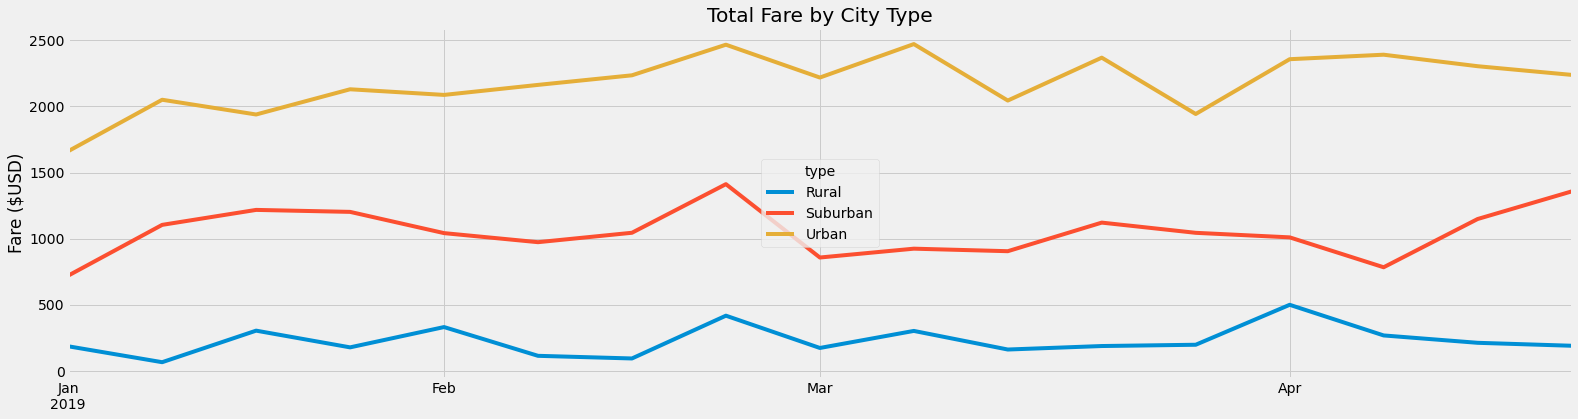

In [140]:
# 8. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 

# Import the style from Matplotlib.
from matplotlib import style
# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')

fig, ax=plt.subplots(figsize=(24, 6))
pyber_weekly_df.plot(ax=ax, title="Total Fare by City Type")
ax.set_ylabel('Fare ($USD)')
ax.set_xlabel('')

# Save the figure.
plt.savefig("Resources\fare_by_city_type.png")
plt.show()